# Simple Linear Regression

## 단순선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dia = datasets.load_diabetes()
print(dia.data.shape, dia.feature_names, sep = '\n')

(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
df = pd.DataFrame(dia.data, columns = dia.feature_names)
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [4]:
X = df['bmi'].values.reshape(-1, 1)  # input에 차원 맞춰줌
y = dia.target

In [5]:
X_train, X_test, y_train, y_test = X[:-20], X[-20:], y[:-20], y[-20:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(422, 1) (20, 1) (422,) (20,)


In [6]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [7]:
r2_score(y_test, y_pred)

0.47257544798227147

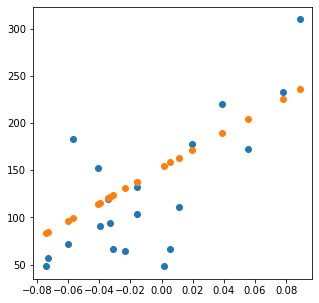

In [8]:
plt.figure(figsize = (5, 5))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.show()

## 중회귀

### 변수 두개만

In [9]:
X = df[['bmi', 'bp']].values.reshape(-1, 2)  # input에 차원 맞춰줌
y = dia.target

In [10]:
X_train, X_test, y_train, y_test = X[:-20], X[-20:], y[:-20], y[-20:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(422, 2) (20, 2) (422,) (20,)


In [11]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_pred

array([235.36691099, 133.70933045, 153.5121259 ,  87.68093352,
       144.03810057, 154.95065843, 257.90721976, 117.5799129 ,
        87.76030214, 137.62081422, 193.68056786,  93.70689643,
       157.23114551, 118.09712226,  74.2890293 , 192.72551778,
       112.69419353, 147.52540954, 183.87540222,  62.42229693])

In [12]:
r2_score(y_test, y_pred)

0.46539551641633004

In [13]:
# 3 차원 표현을 위해 bmi, bp 의 max, min 구간 meshgrid 작성

bmi_min = X_test[:, 0].min()
bmi_max = X_test[:, 0].max()
bp_min  = X_test[:, 1].min()
bp_max  = X_test[:, 1].max()

bmi_space = np.linspace(bmi_min, bmi_max, 100)
bp_space  = np.linspace(bp_min, bp_max, 100)

X1, X2 = np.meshgrid(bmi_space, bp_space)

In [14]:
XX = np.column_stack([X1.ravel(), X2.ravel()])
XX

Y = regr.predict(XX)
Y

array([ 61.58034238,  62.86453569,  64.148729  , ..., 255.33883314,
       256.62302645, 257.90721976])

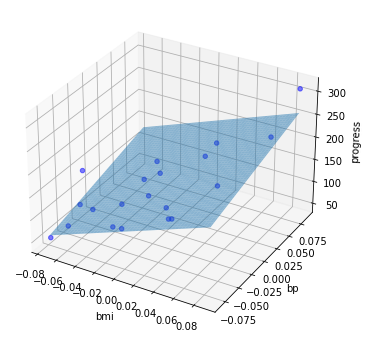

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', marker='o', alpha=0.5)
ax.plot_surface(X1, X2, Y.reshape(X1.shape), alpha=0.5)

ax.set_xlabel('bmi')
ax.set_ylabel('bp')
ax.set_zlabel('progress')
plt.show()

### 변수 전부다 넣기

In [16]:
X = df.values.reshape(-1, len(dia.feature_names))  # input에 차원 맞춰줌
y = dia.target

In [17]:
X_train, X_test, y_train, y_test = X[:-20], X[-20:], y[:-20], y[-20:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(422, 10) (20, 10) (422,) (20,)


In [18]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_pred

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [19]:
r2_score(y_test, y_pred)

0.5850753022690574

# KNN

In [20]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
iris = datasets.load_iris()
iris.data.shape, iris.feature_names, iris.target_names

((150, 4),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [22]:
X = iris.data[:, :2]
y = iris.target
print(X.shape, y.shape)

(150, 2) (150,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [24]:
# hyper parameter 전부 출력
from sklearn import set_config
set_config(print_changed_only = False)

knn = neighbors.KNeighborsClassifier(n_neighbors = 15, weights = 'uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [25]:
y_pred = knn.predict(X_test)

In [26]:
print('accuracy score: {0:.2f}%'.format(accuracy_score(y_test, y_pred)))

accuracy score: 0.73%


In [27]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0  6  5]
 [ 0  3  5]]
